In [15]:
from postgres_conector import PostgresConnector
from charts import Basecharts
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Get candidates data from postgres database
candidates_df = PostgresConnector().query_data("SELECT * FROM candidates")

# Clean candidates_df to filter only hires
hired_df = candidates_df[(candidates_df["Code Challenge Score"]>=7)&(candidates_df["Technical Interview Score"]>=7)]
hired_df["Application Date"] = pd.to_datetime(hired_df["Application Date"])
hired_df["Year"]= hired_df["Application Date"].dt.year

/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_83820/539088556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hired_df["Application Date"] = pd.to_datetime(hired_df["Application Date"])
/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_83820/539088556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hired_df["Year"]= hired_df["Application Date"].dt.year


/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_83820/798119207.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pie_chart.show()


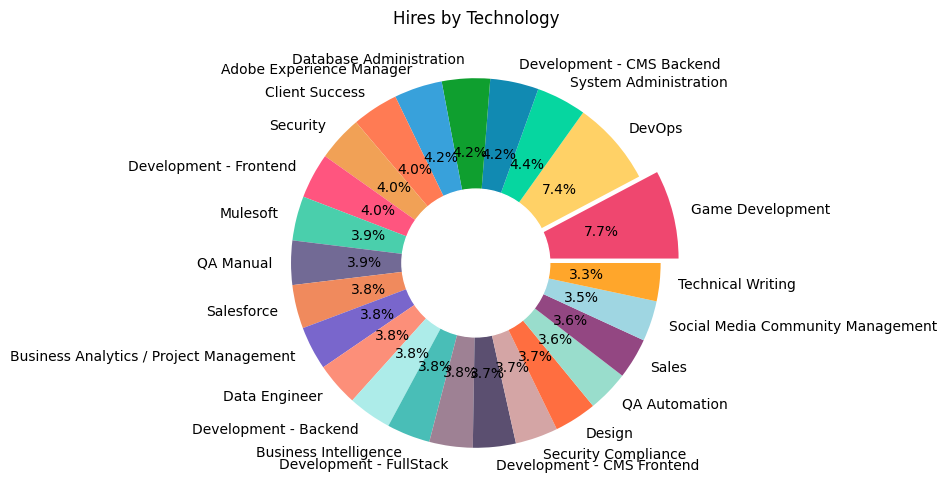

In [8]:
#Hires by technology (pie chart)
summary = hired_df["Technology"].value_counts()
pie_chart =  Basecharts.pie(title="Hires by Technology",summary=summary, donut_shape=0.4)
pie_chart.show()

/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_83820/978656567.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


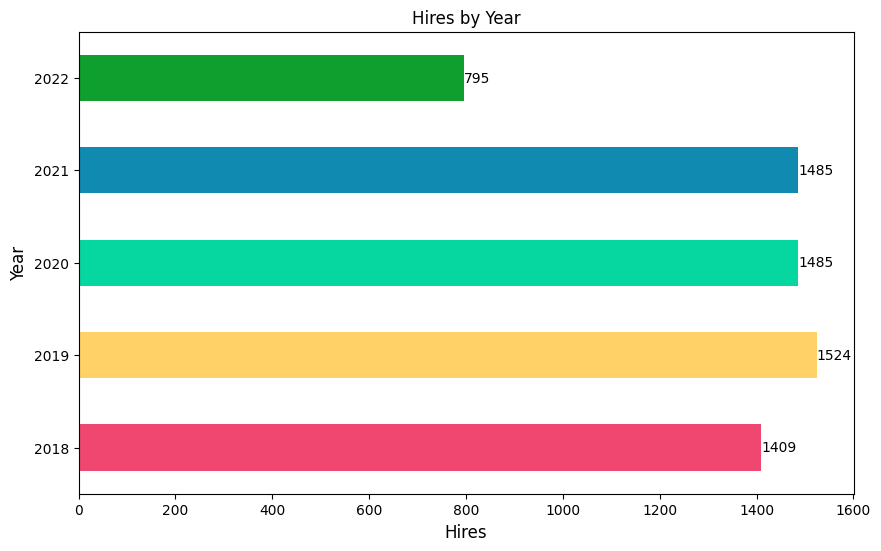

In [9]:
#Hires by year (horizontal bar chart)
summary = hired_df.groupby("Year")["Email"].count()
fig = Basecharts.bar(title="Hires by Year", summary=summary,x_label="Hires", y_label="Year", horizontal=True)
fig.show()

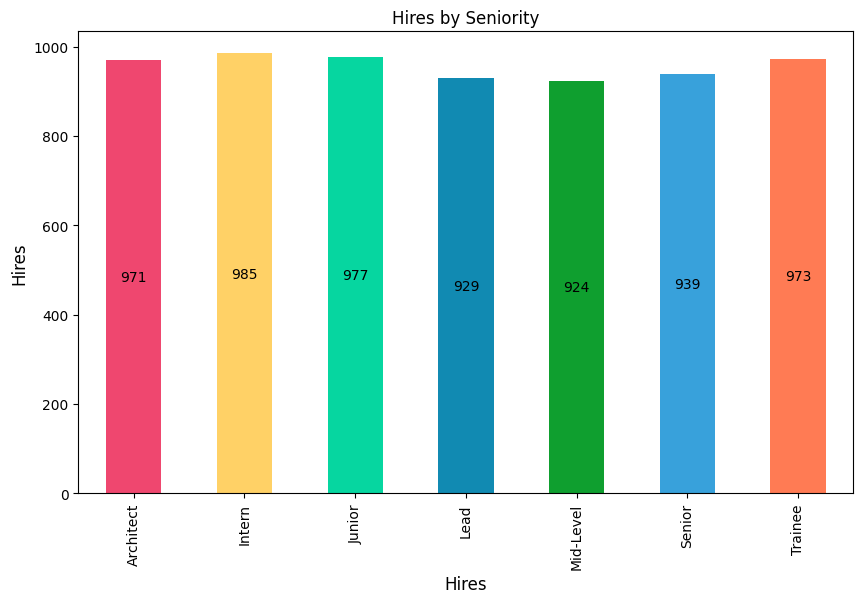

In [10]:
#Hires by seniority (bar chart)
summary = hired_df.groupby("Seniority")["Email"].count()
fig = Basecharts.bar(title="Hires by Seniority", summary=summary,x_label="Hires", y_label="Hires", figsize=(10,6))
plt.show()

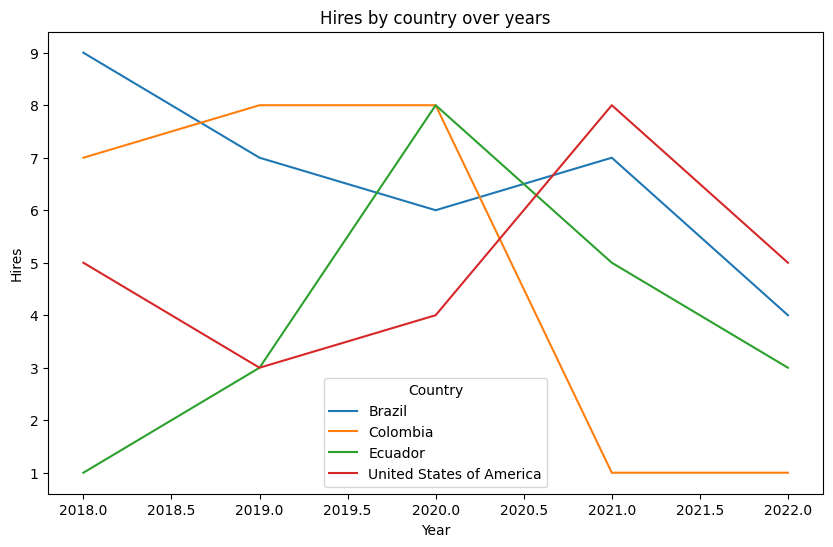

In [20]:
# Hires by country over years (USA, Brazil, Colombia, and Ecuador only)(multiline chart)
hired_by_country_df =  hired_df[hired_df["Country"].isin(["United States of America", "Brazil", "Colombia", "Ecuador"])]
summary = hired_by_country_df.groupby(["Year", "Country"]).size().reset_index(name="Hires")
fig = Basecharts.line(title="Hires by country over years",summary=summary,x="Year", y="Hires", hue="Country")
plt.show()